In [3]:
import matplotlib.pyplot  as plt 
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [50]:
def generatre_ar_process(lags, coefs, length):
    #cast coefs to np array
    coefs=np.array(coefs)

    #initial values
    series=[np.random.normal() for _ in range(lags)]
    # series2=[i for i in series]
    # print(series,"\n")
    # print(series[-lags:],"\n")
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1] ##here first [-lags:] select list elements from -lags to end of list\
        ### then [::-1] is a way to reverse a list using list slicing (it creates a copy of reversed list actually) 
        ### list slicing --> [start:stop:step] leaving start and stop blank implies selecting whole list
        # prev_vals2=series[-lags:]
        # print(prev_vals)
        #get new values of time series
        k=np.random.normal()
        new_val = np.sum(np.array(prev_vals)*coefs)+k
        # new_val2 = np.sum(np.array(prev_vals2)*coefs)+k
        series.append(new_val)
        # series2.append(new_val2)

    return np.array(series)#,np.array(series2)


In [56]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statics: %f' % result[0])
    print('p-value: %f' % result[1])

## AR(1) Process
Stationary

Text(0.5, 1.0, 'Stationary AR(1) Process')

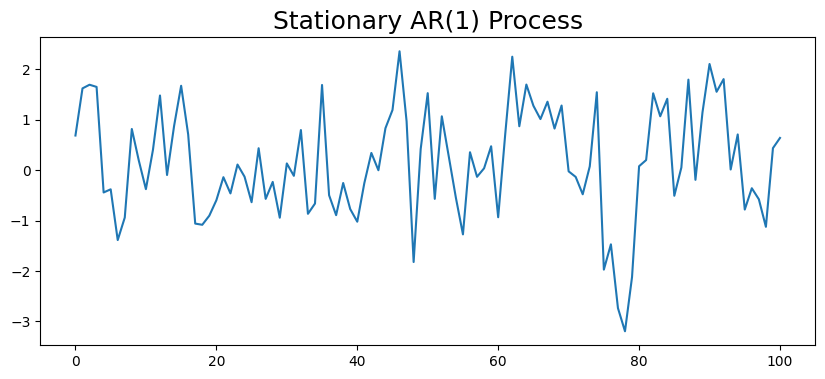

In [80]:
ar1_process=generatre_ar_process(1,[0.5],100)
plt.figure(figsize=(10,4))
plt.plot(ar1_process)
plt.title('Stationary AR(1) Process',fontsize=18)


In [81]:
perform_adf_test(ar1_process)
# if p-value is lower than 0.5 than it is stationary

ADF Statics: -6.099688
p-value: 0.000000


Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

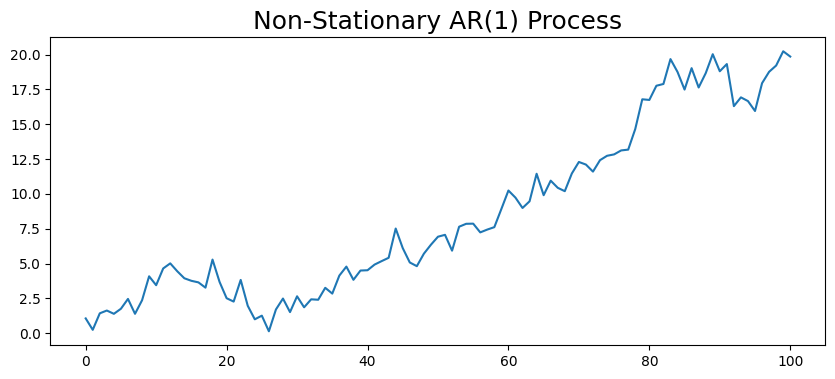

In [82]:
ar1_process_unit_root=generatre_ar_process(1,[1],100) # have unit root so it shuld be non-stationary
plt.figure(figsize=(10,4))
plt.plot(ar1_process_unit_root)
plt.title('Non-Stationary AR(1) Process',fontsize=18)


In [83]:
perform_adf_test(ar1_process_unit_root)

ADF Statics: 0.027314
p-value: 0.960733


## AR(2) Process
Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

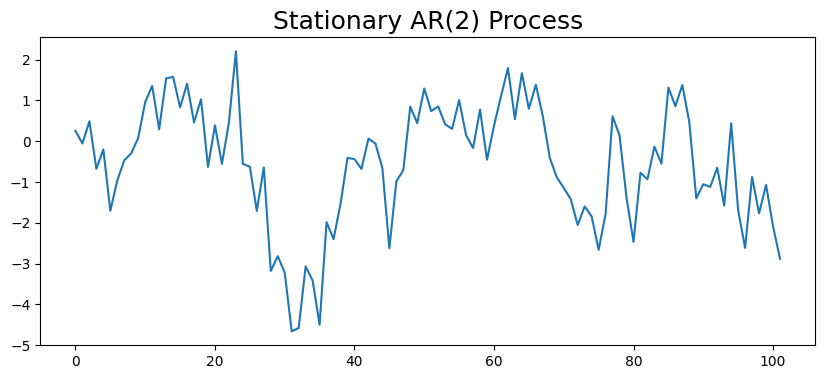

In [85]:
ar2_process=generatre_ar_process(2,[0.5, 0.3],100) # have unit root so it shuld be non-stationary
plt.figure(figsize=(10,4))
plt.plot(ar2_process)
plt.title('Stationary AR(2) Process',fontsize=18)


In [86]:
perform_adf_test(ar2_process)

ADF Statics: -2.621335
p-value: 0.088667


Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

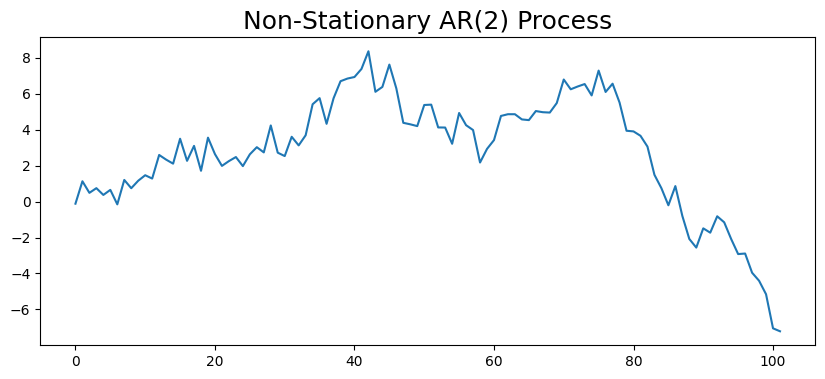

In [89]:
ar2_process_unit_root=generatre_ar_process(2,[0.7, 0.3],100) # since its coefficints sum upto 1 it is non-stationary
plt.figure(figsize=(10,4))
plt.plot(ar2_process_unit_root)
plt.title('Non-Stationary AR(2) Process',fontsize=18)


In [90]:
perform_adf_test(ar2_process_unit_root)

ADF Statics: 0.800486
p-value: 0.991644
